# Exercise 6 - Dimensionality Reduction with PCA, Kernel PCA and FA(Factor Analysis)

## Data preparation
Your objective here is to get the flow data used for dimensionality reduction; The provided dataset is 5-minute observations on highway microwave sensors and needs to be in a format ready for dimensionality reduction. Thus, we represent days as ordered vectors of day-time observations of size 288 (there are 288, 5-minute time observations)

In [1]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab
data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


In [2]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])
# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)
# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])
# Define the total number of 5-minute intervals in a day
nintvals = 288

In [3]:
# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)
# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])
    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])
        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]
# Print the resulting 'vectorized_day_dataset' and the size of vector
print(vectorized_day_dataset)
print(vectorized_day_dataset.shape)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]
(365, 288)


In [4]:
# print the number of days with missing value
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value:',np.size(np.where(nans_per_day > 0),1))

number of days with missing value: 28


Drop the days with missing valus

In [5]:
# Drop the days with missing valus
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
# days_not_nans = days[np.where(nans_per_day == 0)[0]]
print(vectorized_day_dataset_no_nans.shape)

(337, 288)


Text(0.5, 1.0, 'Kernel PCA (Polynomial)')

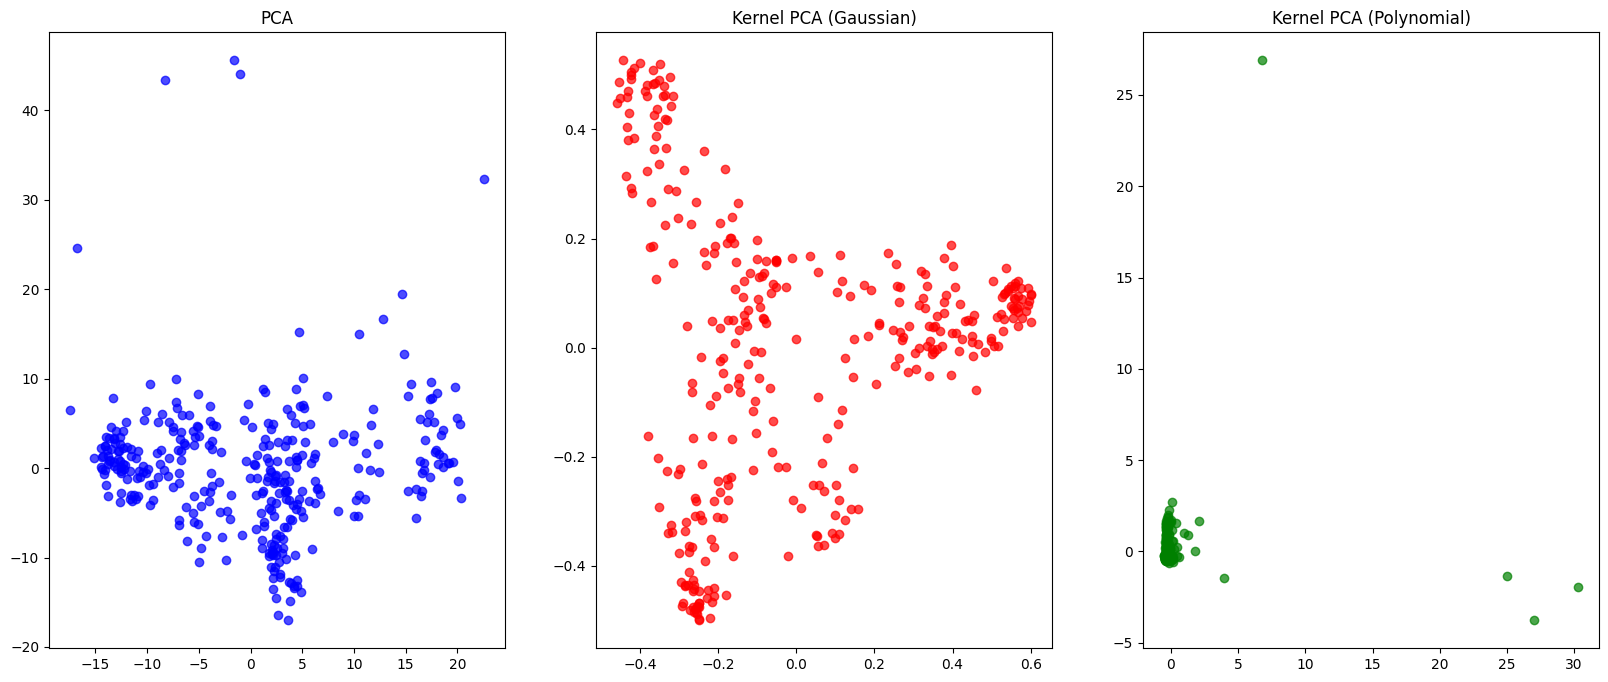

In [42]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings

#warnings.simplefilter(action='ignore', category='FutureWarning')


# Assuming you have your dataset loaded as 'data'
# If not, replace this with loading your actual dataset

da = pd.DataFrame(vectorized_day_dataset_no_nans)
scaler = StandardScaler()
#data = scaler.fit_transform(da)

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Set the desired number of components
pca_result = pca.fit_transform(data)

# Step 2: Perform Kernel PCA with different kernel functions
# kernel functions : 'linear', 'rbf', 'poly', 'sigmoid'

kernel_pca_gaussian = KernelPCA(kernel='rbf', gamma=None, n_components=2)  # Gaussian kernel
kernel_pca_polynomial = KernelPCA(kernel='poly', degree=3, n_components=2)  # Polynomial kernel

kpca_gaussian_result = kernel_pca_gaussian.fit_transform(data)
kpca_polynomial_result = kernel_pca_polynomial.fit_transform(data)

# Step 3: Pick the best kernel function based on your assessment
# You may evaluate the results using some metric or visual inspection

# For example, you can visualize the results
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='b', marker='o', alpha=0.7)
plt.title('PCA')

plt.subplot(1, 3, 2)
plt.scatter(kpca_gaussian_result[:, 0], kpca_gaussian_result[:, 1], c='r', marker='o', alpha=0.7)
plt.title('Kernel PCA (Gaussian)')

plt.subplot(1, 3, 3)
plt.scatter(kpca_polynomial_result[:, 0], kpca_polynomial_result[:, 1], c='g', marker='o', alpha=0.7)
plt.title('Kernel PCA (Polynomial)')

# Note: You might need to fine-tune parameters for the kernel functions (e.g., gamma for the Gaussian kernel) based on your specific dataset.


In [34]:
pca.explained_variance_ratio_

array([0.31725246, 0.19340224])

In [54]:
import numpy as np
from sklearn.decomposition import PCA

# Generate example data (replace with your own dataset)
np.random.seed(0) # 100 samples, 10 variables

# Define the number of iterations for stability analysis
num_iterations = 100

# Define the proportion of data to use in each iteration (e.g., 80%)
prop_data_used = 0.8

# Initialize an array to store the principal component scores
all_pc_scores = []
all_kpcg_scores = []
all_kpcp_scores = []
all_kpcs_scores = []
all_kpcl_scores = []

# Perform PCA on different random subsets of the data
for _ in range(num_iterations):
    # Randomly select a subset of the data
    subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
    subset_data = data[subset_indices]
    
    # Fit PCA on the subset
    pca = PCA(n_components=2)
    pca.fit(subset_data)
    
    kernel_pca_gaussian = KernelPCA(kernel='rbf', gamma=None, n_components=2)
    kernel_pca_gaussian.fit(subset_data)

    kernel_pca_poly = KernelPCA(kernel='poly', gamma=None, n_components=2)
    kernel_pca_poly.fit(subset_data)

    kernel_pca_sig = KernelPCA(kernel='sigmoid', gamma=None, n_components=2)
    kernel_pca_sig.fit(subset_data)

    kernel_pca_lin = KernelPCA(kernel='linear', gamma=None, n_components=2)
    kernel_pca_lin.fit(subset_data)

    # Get the principal component scores for the entire dataset
    pc_scores = pca.transform(data)
    all_pc_scores.append(pc_scores)

    kpcg_scores = kernel_pca_gaussian.transform(data)
    all_kpcg_scores.append(kpcg_scores)

    kpcp_scores = kernel_pca_poly.transform(data)
    all_kpcp_scores.append(kpcp_scores)

    kpcs_scores = kernel_pca_sig.transform(data)
    all_kpcs_scores.append(kpcs_scores)

    kpcl_scores = kernel_pca_lin.transform(data)
    all_kpcl_scores.append(kpcl_scores)


# Calculate the std and standard deviation of the principal component scores
mean_scores = np.std(all_pc_scores, axis=0)
std_scores = np.std(all_pc_scores, axis=0)

gauss_mean_scores = np.mean(all_kpcg_scores, axis=0)
gauss_std_scores = np.std(all_kpcg_scores, axis=0)

poly_mean_scores = np.mean(all_kpcp_scores, axis=0)
poly_std_scores = np.std(all_kpcp_scores, axis=0)

sig_mean_scores = np.mean(all_kpcs_scores, axis=0)
sig_std_scores = np.std(all_kpcs_scores, axis=0)

lin_mean_scores = np.mean(all_kpcl_scores, axis=0)
lin_std_scores = np.std(all_kpcl_scores, axis=0)

# You can use 'mean_scores' and 'std_scores' for further analysis or visualization

Text(0.5, 1.0, 'Kernel PCA (Linear)')

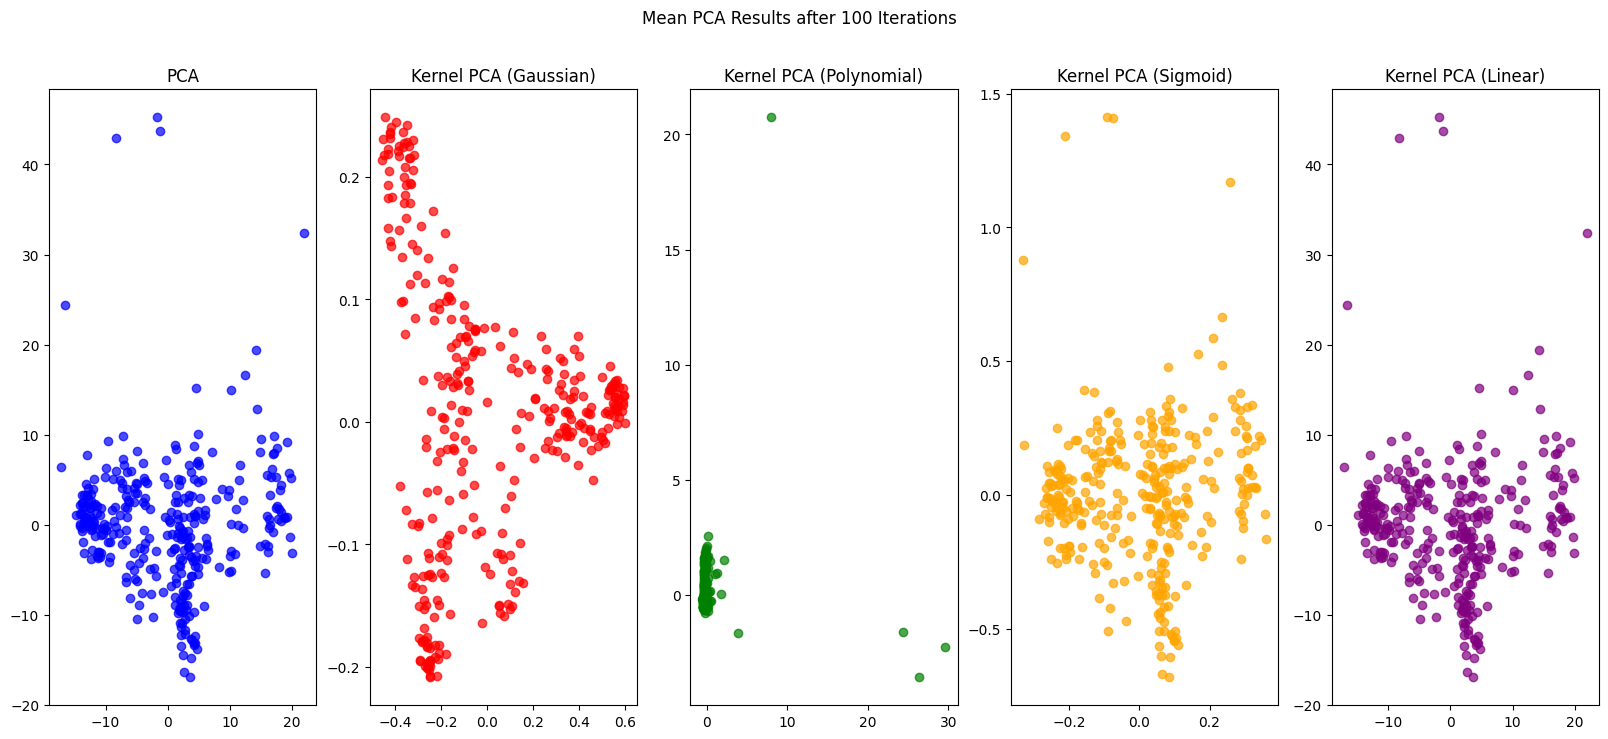

In [59]:
plt.figure(figsize=(20, 8))
plt.suptitle('Mean PCA Results after 100 Iterations')
plt.subplot(1, 5, 1)
plt.scatter(mean_scores[:, 0], mean_scores[:, 1], c='b', marker='o', alpha=0.7)
plt.title('PCA')

plt.subplot(1, 5, 2)
plt.scatter(gauss_mean_scores[:, 0], gauss_mean_scores[:, 1], c='r', marker='o', alpha=0.7)
plt.title('Kernel PCA (Gaussian)')

plt.subplot(1, 5, 3)
plt.scatter(poly_mean_scores[:, 0], poly_mean_scores[:, 1], c='g', marker='o', alpha=0.7)
plt.title('Kernel PCA (Polynomial)')

plt.subplot(1, 5, 4)
plt.scatter(sig_mean_scores[:, 0], sig_mean_scores[:, 1], c='orange', marker='o', alpha=0.7)
plt.title('Kernel PCA (Sigmoid)')

plt.subplot(1, 5, 5)
plt.scatter(lin_mean_scores[:, 0], lin_mean_scores[:, 1], c='purple', marker='o', alpha=0.7)
plt.title('Kernel PCA (Linear)')



Text(0.5, 1.0, 'Kernel PCA (Linear)')

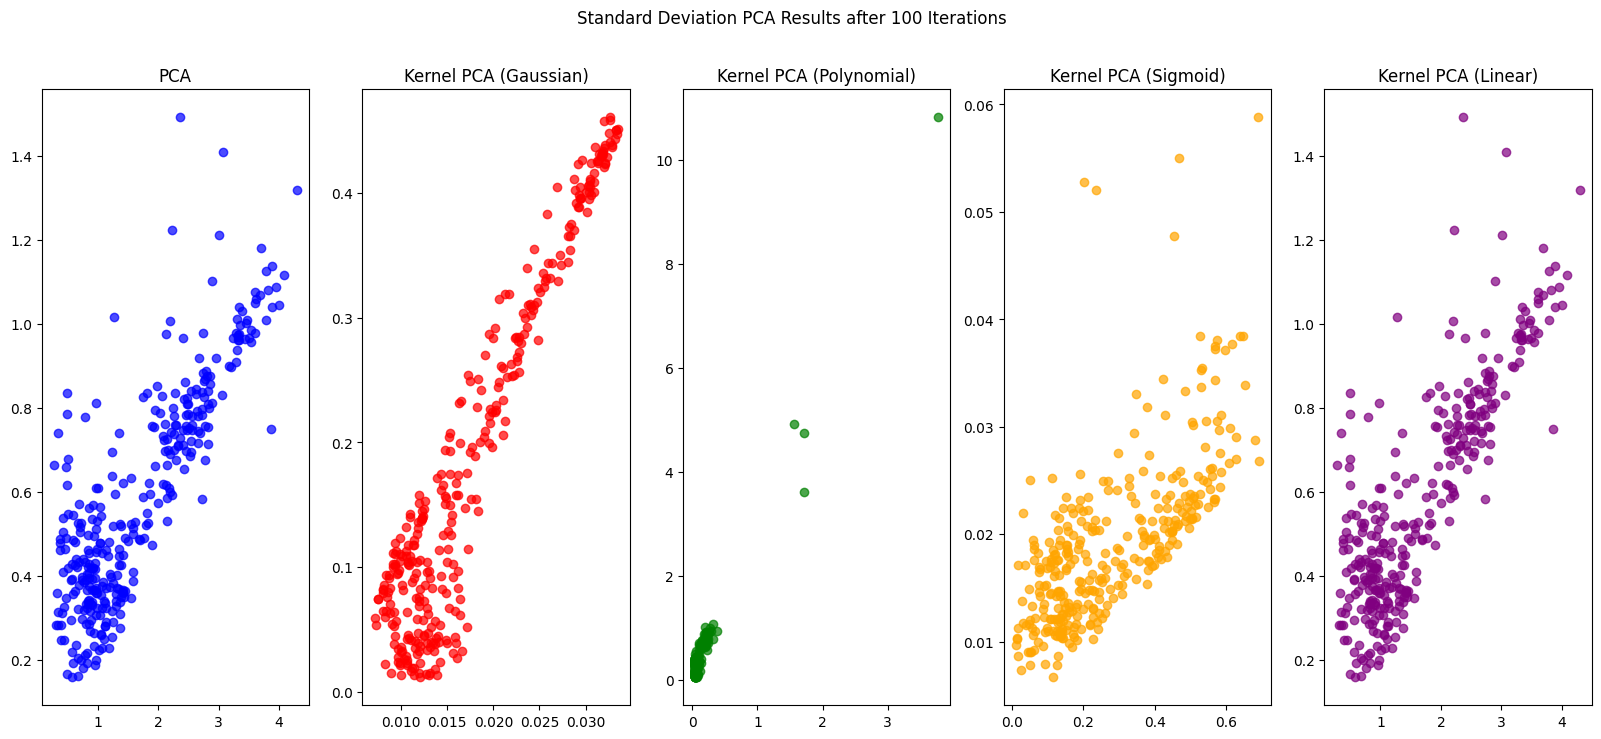

In [60]:
plt.figure(figsize=(20, 8))
plt.suptitle('Standard Deviation PCA Results after 100 Iterations')
plt.subplot(1, 5, 1)
plt.scatter(std_scores[:, 0], std_scores[:, 1], c='b', marker='o', alpha=0.7)
plt.title('PCA')

plt.subplot(1, 5, 2)
plt.scatter(gauss_std_scores[:, 0], gauss_std_scores[:, 1], c='r', marker='o', alpha=0.7)
plt.title('Kernel PCA (Gaussian)')

plt.subplot(1, 5, 3)
plt.scatter(poly_std_scores[:, 0], poly_std_scores[:, 1], c='g', marker='o', alpha=0.7)
plt.title('Kernel PCA (Polynomial)')

plt.subplot(1, 5, 4)
plt.scatter(sig_std_scores[:, 0], sig_std_scores[:, 1], c='orange', marker='o', alpha=0.7)
plt.title('Kernel PCA (Sigmoid)')

plt.subplot(1, 5, 5)
plt.scatter(lin_std_scores[:, 0], lin_std_scores[:, 1], c='purple', marker='o', alpha=0.7)
plt.title('Kernel PCA (Linear)')

In [133]:
def stability_index(scores, threshold=0.9):
    """
    Calculate the stability index based on the proportion of variance explained.
    
    Args:
        scores (array): Array of principal component scores.
        threshold (float): Threshold for the proportion of variance explained.
        
    Returns:
        stability_index (float): Stability index.
    """
    total_variance = np.var(scores, axis=1).sum()
    explained_variance = np.var(scores, axis=1)
    prop_var_explained = explained_variance / total_variance
    return np.mean(prop_var_explained > threshold)

In [106]:
import numpy as np
from sklearn.decomposition import PCA

# Generate example data (replace with your own dataset)
np.random.seed(0) # 100 samples, 10 variables

# Define the number of iterations for stability analysis
num_iterations = 100

# Define the proportion of data to use in each iteration (e.g., 80%)
prop_data_used = 0.8

# Initialize an array to store the principal component scores
all_pc_scores = []
all_kpcg_scores = []
all_kpcp_scores = []
all_kpcs_scores = []
all_kpcl_scores = []

# Perform PCA on different random subsets of the data
for _ in range(num_iterations):
    # Randomly select a subset of the data
    subset_indices = np.random.choice(data.shape[0], size=int(prop_data_used * data.shape[0]), replace=False)
    subset_data = data[subset_indices]
    
    # Fit PCA on the subset
    pca = PCA(n_components=2)
    pca.fit(subset_data)
    
    kernel_pca_gaussian = KernelPCA(kernel='rbf', gamma=None, n_components=2)
    kernel_pca_gaussian.fit(subset_data)

    kernel_pca_poly = KernelPCA(kernel='poly', gamma=None, n_components=2)
    kernel_pca_poly.fit(subset_data)

    kernel_pca_sig = KernelPCA(kernel='sigmoid', gamma=None, n_components=2)
    kernel_pca_sig.fit(subset_data)

    kernel_pca_lin = KernelPCA(kernel='linear', gamma=None, n_components=2)
    kernel_pca_lin.fit(subset_data)

    # Get the principal component scores for the entire dataset
    pc_scores = pca.transform(data)
    all_pc_scores.append(pc_scores)

    kpcg_scores = kernel_pca_gaussian.transform(data)
    all_kpcg_scores.append(kpcg_scores)

    kpcp_scores = kernel_pca_poly.transform(data)
    all_kpcp_scores.append(kpcp_scores)

    kpcs_scores = kernel_pca_sig.transform(data)
    all_kpcs_scores.append(kpcs_scores)

    kpcl_scores = kernel_pca_lin.transform(data)
    all_kpcl_scores.append(kpcl_scores)


# Calculate the std and standard deviation of the principal component scores
mean_scores = np.std(all_pc_scores, axis=0)
std_scores = np.std(all_pc_scores, axis=0)

gauss_mean_scores = np.mean(all_kpcg_scores, axis=0)
gauss_std_scores = np.std(all_kpcg_scores, axis=0)

poly_mean_scores = np.mean(all_kpcp_scores, axis=0)
poly_std_scores = np.std(all_kpcp_scores, axis=0)

sig_mean_scores = np.mean(all_kpcs_scores, axis=0)
sig_std_scores = np.std(all_kpcs_scores, axis=0)

lin_mean_scores = np.mean(all_kpcl_scores, axis=0)
lin_std_scores = np.std(all_kpcl_scores, axis=0)

# You can use 'mean_scores' and 'std_scores' for further analysis or visualization


In [134]:
stability_idx = stability_index(np.array(all_pc_scores))
gauss_stability_idx = stability_index(np.array(all_kpcg_scores))
poly_stability_idx = stability_index(np.array(all_kpcp_scores))
sig_stability_idx = stability_index(np.array(all_kpcs_scores))
lin_stability_idx = stability_index(np.array(all_kpcl_scores))

stab_res = [stability_idx, gauss_stability_idx, poly_stability_idx, sig_stability_idx, lin_stability_idx]


In [144]:
len(all_pc_scores[0])

337

In [132]:
end_sum = 0
for score in stab_res[2]:
    end_sum += score[0]
end_sum

0.10270596634003087

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

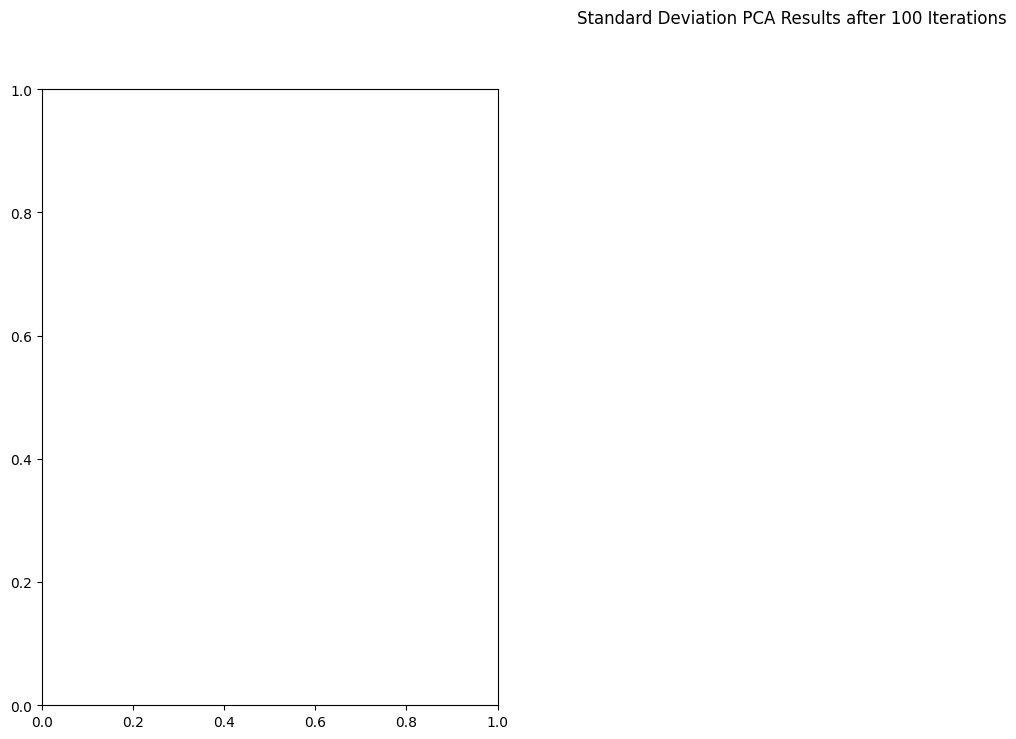

In [148]:
plt.figure(figsize=(20, 8))
plt.suptitle('Standard Deviation PCA Results after 100 Iterations')
plt.subplot(1, 3, 1)
plt.scatter(std_scores[:, 0], std_scores[:, 1], c=data['date'], marker='o', alpha=0.7)
plt.title('PCA')